In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split

!pip install dataprep
from dataprep.eda import create_report

import warnings
warnings.filterwarnings('ignore')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 55.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.6 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252690 sha256=3a262e3789ec7

In [2]:
#Loading dataset
glass = pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


EDA

In [3]:

glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:

glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:

glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [6]:

glass=glass.drop_duplicates()



In [7]:
glass.shape

(213, 10)

Data visualisation

In [8]:
!pip install dython


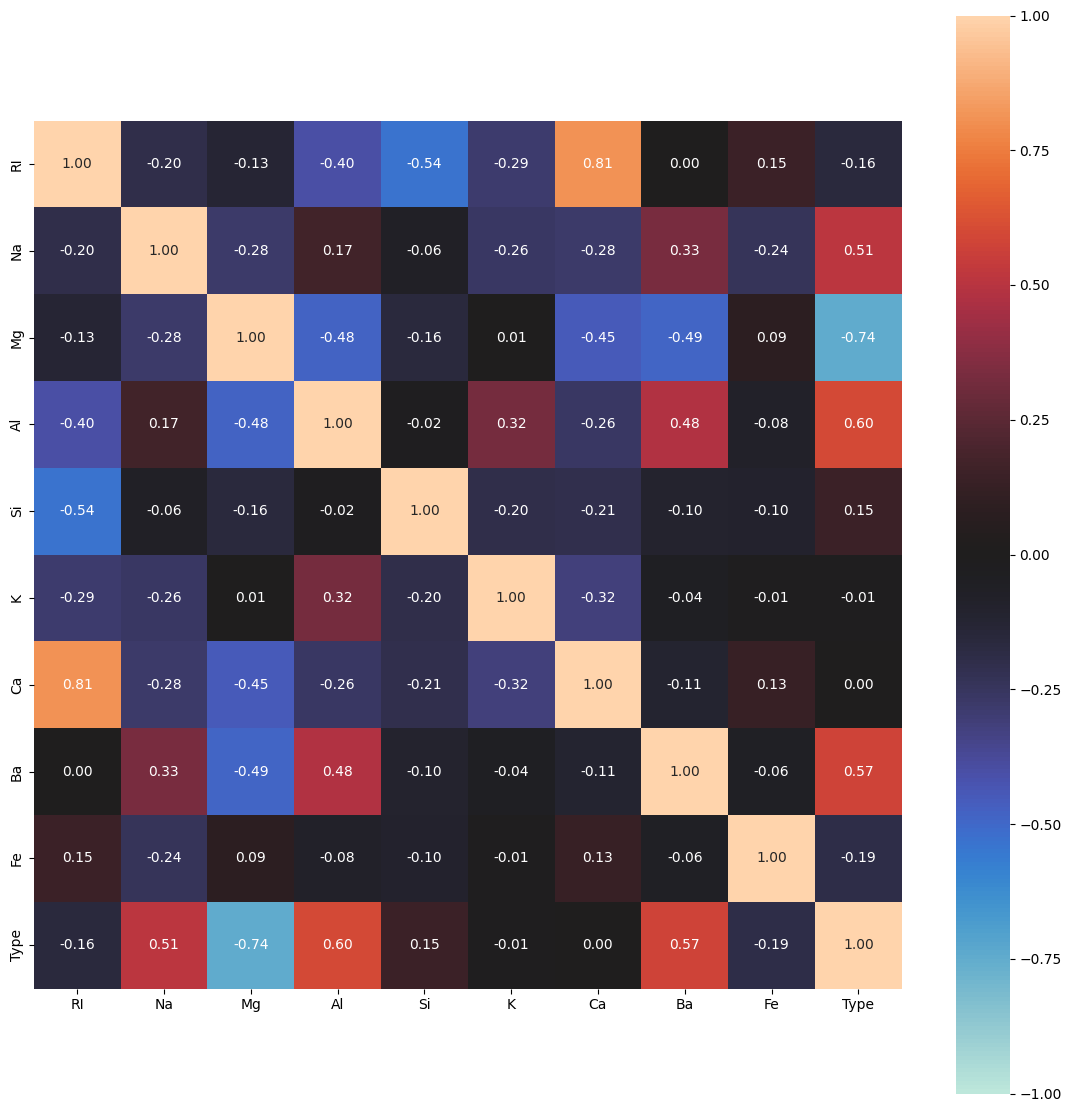

{'corr':             RI        Na        Mg        Al        Si         K        Ca  \
 RI    1.000000 -0.198802 -0.127526 -0.400973 -0.539000 -0.287645  0.811183   
 Na   -0.198802  1.000000 -0.278420  0.167735 -0.064885 -0.264158 -0.278194   
 Mg   -0.127526 -0.278420  1.000000 -0.479575 -0.162437  0.007617 -0.446197   
 Al   -0.400973  0.167735 -0.479575  1.000000 -0.016195  0.323683 -0.258068   
 Si   -0.539000 -0.064885 -0.162437 -0.016195  1.000000 -0.197281 -0.207145   
 K    -0.287645 -0.264158  0.007617  0.323683 -0.197281  1.000000 -0.317032   
 Ca    0.811183 -0.278194 -0.446197 -0.258068 -0.207145 -0.317032  1.000000   
 Ba    0.001679  0.329080 -0.491818  0.480642 -0.104389 -0.043653 -0.112208   
 Fe    0.147083 -0.239374  0.085426 -0.080583 -0.097717 -0.009372  0.126314   
 Type -0.160140  0.508837 -0.744195  0.597432  0.147725 -0.012455  0.002677   
 
             Ba        Fe      Type  
 RI    0.001679  0.147083 -0.160140  
 Na    0.329080 -0.239374  0.508837  
 Mg   -

In [9]:
from dython.nominal import associations #not much difference b/n associations and corr()

associations(glass, figsize=(14,14))


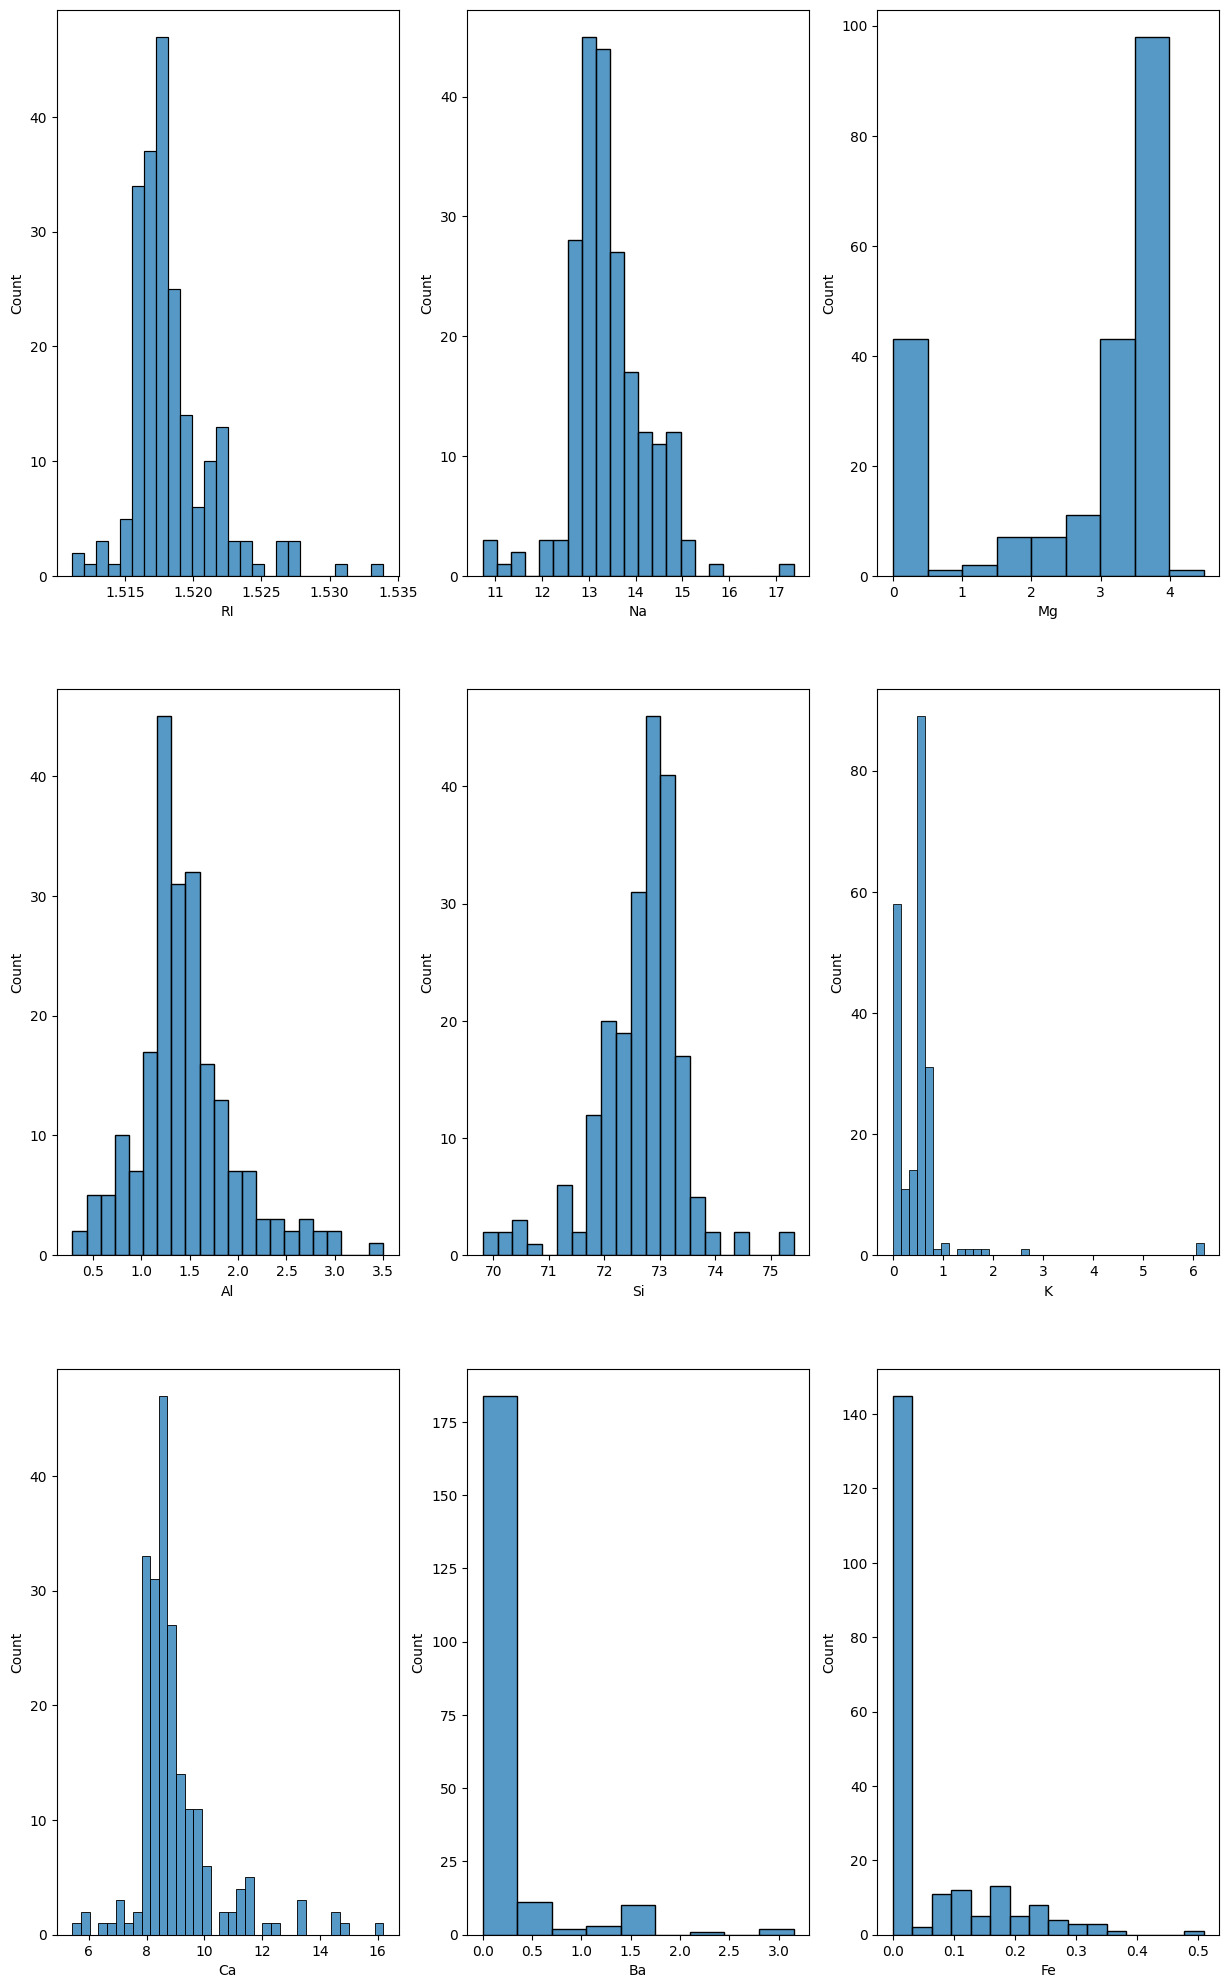

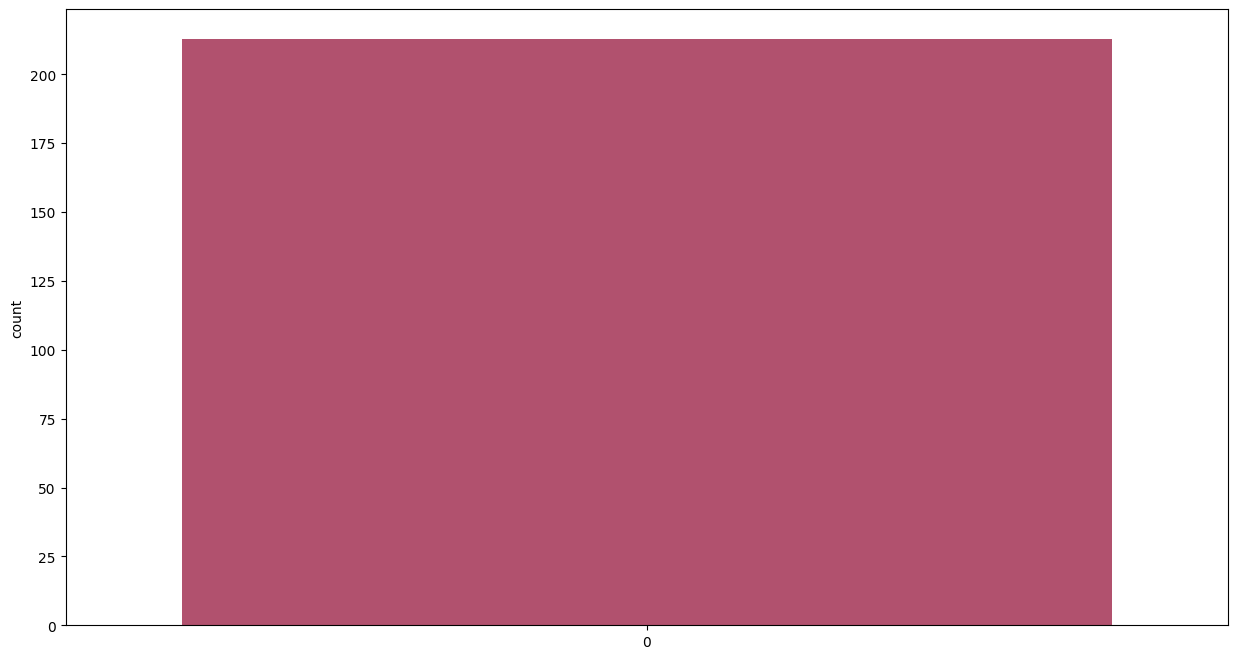

In [10]:
fig, ax =plt.subplots(3,3, figsize=(15,25))

sns.histplot(glass['RI'], palette='mako', ax=ax[0,0])
sns.histplot(glass['Na'], palette='mako', ax=ax[0,1])
sns.histplot(glass['Mg'], palette='mako', ax=ax[0,2])

sns.histplot(glass['Al'], palette='mako', ax=ax[1,0])
sns.histplot(glass['Si'], palette='mako', ax=ax[1,1])
sns.histplot(glass['K'], palette='mako', ax=ax[1,2])

sns.histplot(glass['Ca'], palette='mako', ax=ax[2,0])
sns.histplot(glass['Ba'], palette='mako', ax=ax[2,1])
sns.histplot(glass['Fe'], palette='mako', ax=ax[2,2])

plt.figure(figsize=(15,8))
sns.countplot(glass['Type'], palette='flare')

plt.show()


Data Pre-Processing

Outlier removal

<Axes: >

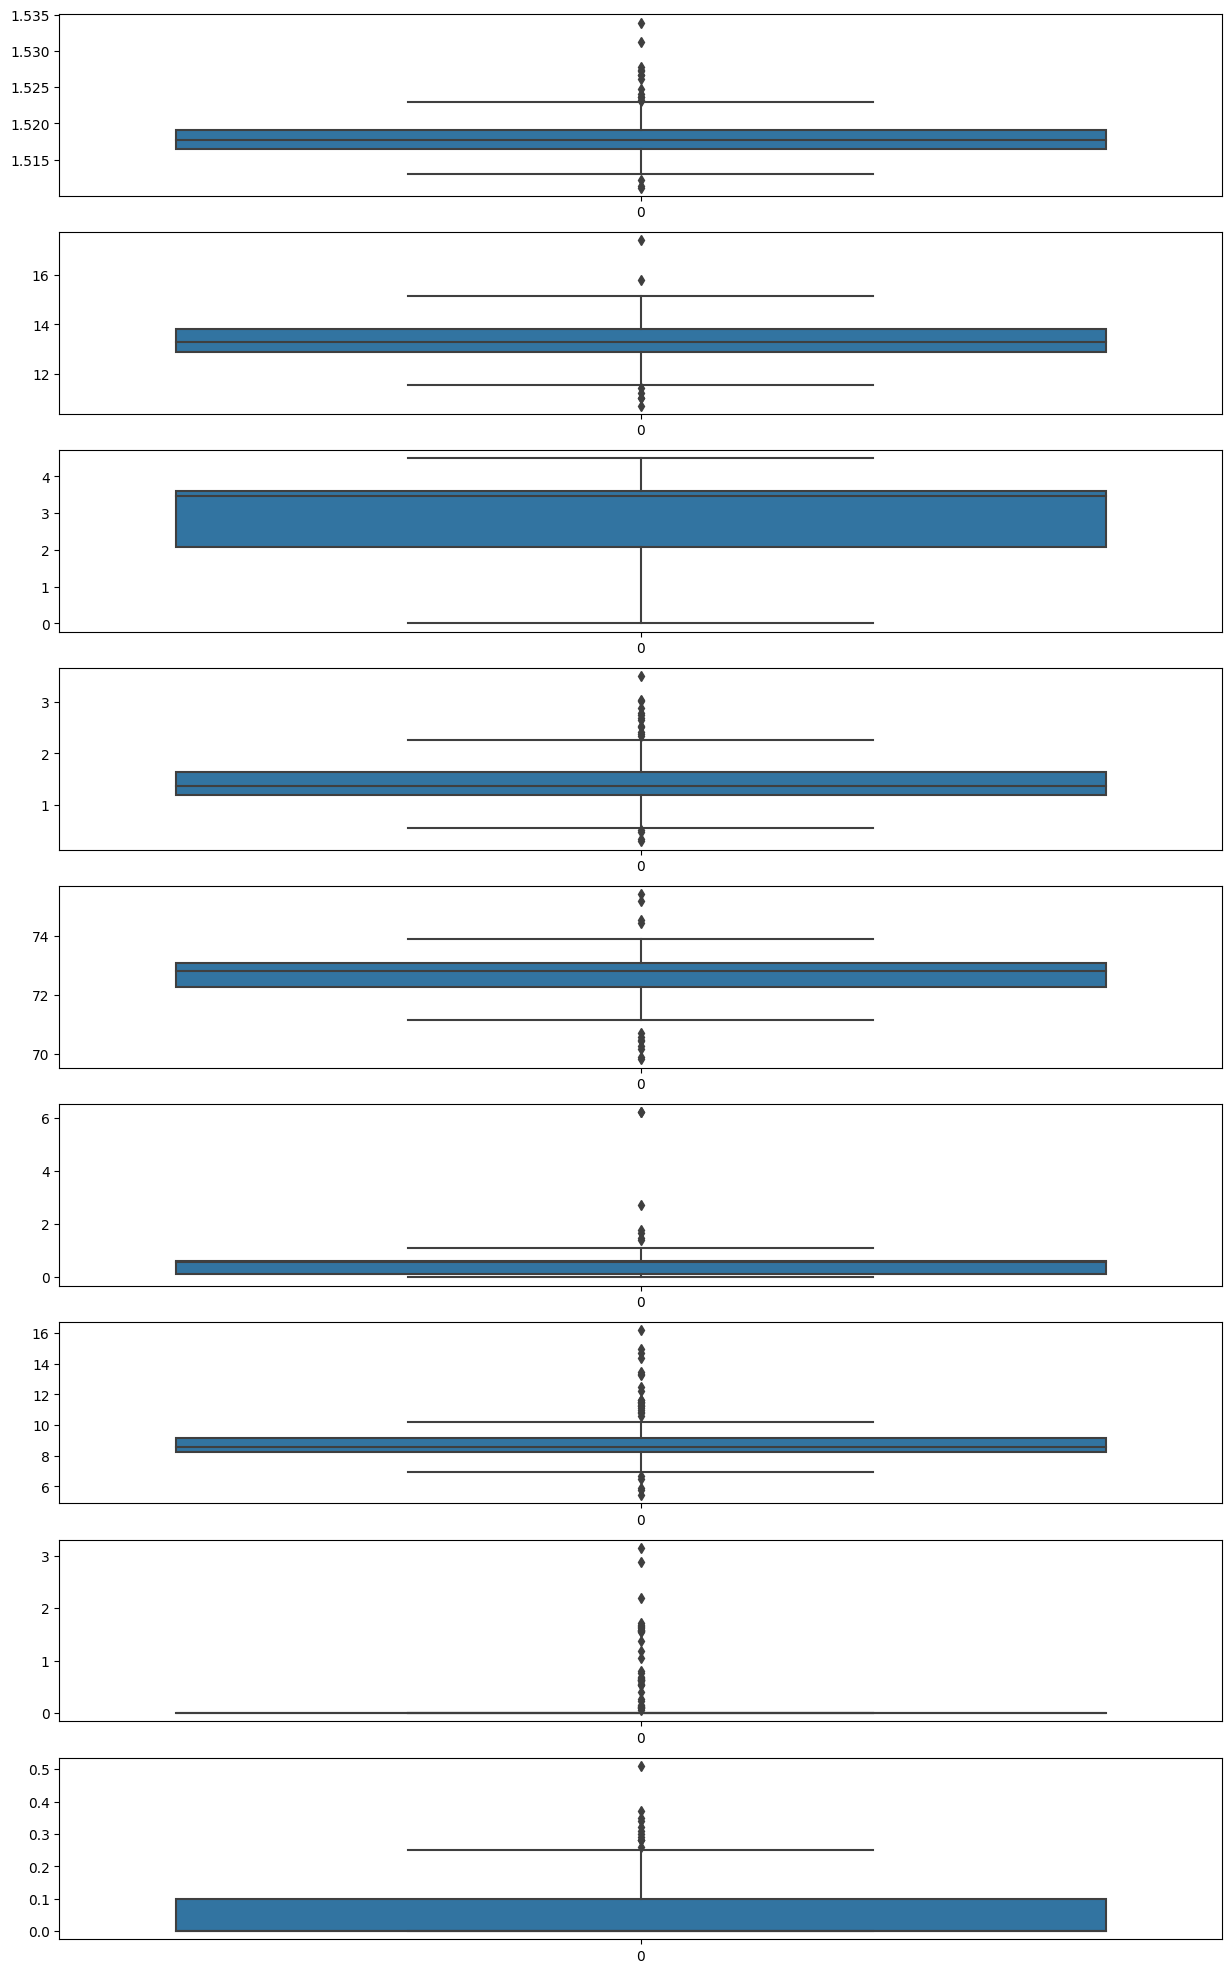

In [11]:
fig, ax =plt.subplots(9,1, figsize=(15,25))

sns.boxplot(glass['RI'], ax=ax[0])
sns.boxplot(glass['Na'], ax=ax[1])
sns.boxplot(glass['Mg'], ax=ax[2])

sns.boxplot(glass['Al'], ax=ax[3])
sns.boxplot(glass['Si'], ax=ax[4])
sns.boxplot(glass['K'],  ax=ax[5])

sns.boxplot(glass['Ca'], ax=ax[6])
sns.boxplot(glass['Ba'], ax=ax[7])
sns.boxplot(glass['Fe'], ax=ax[8])

In [12]:
glass1 = glass.drop('Type' , axis=1)

outliers = []

for feature in glass1.columns:
    Q1,Q3 = np.percentile(glass1[feature], [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outlier = glass1[feature][ (glass1[feature] < ll) |  (glass1[feature] > ul)]

    outliers.append(outlier)


In [13]:
outliers # shows which rows are outlier for which feature

[47     1.52667
 50     1.52320
 56     1.51215
 103    1.52725
 104    1.52410
 105    1.52475
 106    1.53125
 107    1.53393
 110    1.52664
 111    1.52739
 112    1.52777
 131    1.52614
 170    1.52369
 184    1.51115
 185    1.51131
 187    1.52315
 189    1.52365
 Name: RI, dtype: float64,
 105    11.45
 106    10.73
 110    11.23
 111    11.02
 166    11.03
 184    17.38
 189    15.79
 Name: Na, dtype: float64,
 Series([], Name: Mg, dtype: float64),
 21     0.29
 38     0.47
 50     0.51
 163    3.50
 171    3.04
 172    3.02
 184    0.34
 191    2.38
 192    2.79
 195    2.68
 196    2.54
 197    2.34
 198    2.66
 199    2.51
 202    2.42
 208    2.74
 209    2.88
 Name: Al, dtype: float64,
 103    70.57
 106    69.81
 107    70.16
 109    74.45
 163    69.89
 171    70.48
 172    70.70
 180    74.55
 184    75.41
 188    70.26
 189    70.43
 201    75.18
 Name: Si, dtype: float64,
 163    1.68
 171    6.21
 172    6.21
 185    1.76
 186    1.46
 201    2.70
 207    1.41
 Na

In [14]:
outliers_df = pd.DataFrame(outliers)
outliers_df

,47,50,56,103,104,105,106,107,110,111,...,211,212,213,5,44,71,118,135,145,162
RI,1.52667,1.5232,1.51215,1.52725,1.5241,1.52475,1.53125,1.53393,1.52664,1.52739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Na,NaN,NaN,NaN,NaN,NaN,11.45000,10.73000,NaN,11.23000,11.02000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al,NaN,0.5100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Si,NaN,NaN,NaN,70.57000,NaN,NaN,69.81000,70.16000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ca,NaN,NaN,NaN,11.64000,10.7900,13.24000,13.30000,16.19000,14.68000,14.96000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ba,NaN,NaN,NaN,NaN,NaN,NaN,3.15000,NaN,NaN,NaN,...,1.64,1.57,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,NaN,NaN,0.31000,NaN,NaN,0.34000,0.28000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.26,0.3,0.32,0.29,0.28,0.35,0.37


In [15]:
np.isfinite(outliers_df) # true = outlier
#eg: row 47 is outlier for column RI
#eg: row 50 is outlier for column RI

,47,50,56,103,104,105,106,107,110,111,...,211,212,213,5,44,71,118,135,145,162
RI,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
Na,False,False,False,False,False,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
Mg,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Al,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Si,False,False,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
K,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Ca,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
Ba,False,False,False,False,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,False
Fe,False,False,True,False,False,True,True,False,False,False,...,False,False,False,True,True,True,True,True,True,True


In [16]:
outlier_count = np.isfinite(outliers_df).sum() # shows which row is outlier for how many features
outlier_count

47     1
50     2
56     2
103    3
104    2
      ..
71     1
118    1
135    1
145    1
162    1
Length: 78, dtype: int64

In [17]:
outlier_count_df = pd.DataFrame(outlier_count)
outlier_count_df


,0
47,1
50,2
56,2
103,3
104,2
...,...
71,1
118,1
135,1
145,1


In [18]:
outlier_count_df['new_index'] = range(0, len(outlier_count_df))
outlier_count_df = outlier_count_df.rename(columns={0:'outlier_count'})
outlier_count_df['index'] = outlier_count_df.index
outlier_count_df = outlier_count_df.set_index('new_index')
outlier_count_df

,outlier_count,index
new_index,,
0,1,47
1,2,50
2,2,56
3,3,103
4,2,104
...,...,...
73,1,71
74,1,118
75,1,135


In [19]:
index = []
for i in range (0, len(outlier_count_df)):
    if outlier_count_df['outlier_count'][i] > 2:
        index.append(outlier_count_df['index'][i])


In [20]:
len(index) # 14 entries are such that they have values which are outliers for more than 2 columns


14

In [21]:
index

[103, 105, 106, 107, 110, 111, 184, 185, 189, 163, 171, 172, 186, 207]

In [22]:
glass_df = glass.drop([103, 105, 106, 107, 110, 111, 184, 185, 189, 163, 171, 172, 186, 207])


In [23]:
glass_df.shape

(199, 10)

Test Train Split & K fold cross validation

In [24]:
x = glass_df.drop(['Type'] , axis=1)
y = glass_df[['Type']]

Standardize the Variables

In [25]:

from sklearn.preprocessing import StandardScaler
std = StandardScaler()



In [26]:
x = std.fit_transform(x) # not transforming y since it is categorical

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [28]:
print('Shape of X_train: ' ,x_train.shape)
print('Shape of X_test: ' , x_test.shape)
print('Shape of y_train: ' ,y_train.shape)
print('Shape of y_test' ,y_test.shape)

Shape of X_train:  (139, 9)
Shape of X_test:  (60, 9)
Shape of y_train:  (139, 1)
Shape of y_test (60, 1)


How to choose the optimum value for K(neighbours)?

Initially lets take random k value..

K = 3



In [29]:
num_folds = 10
kfold = KFold(n_splits=10, shuffle=True)

In [30]:
model = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(model, x, y, cv=kfold)

# we are using x and y instead of x_train, y_train because we are using k-fold cross validation

In [31]:
print('Accuracy with k = 3 and k fold validation', np.round(results.mean(),3))

Accuracy with k = 3 and k fold validation 0.689


In [32]:

# if you want to use train test split then
model = KNeighborsClassifier(n_neighbors=3) # K = 3
model.fit(x_train,y_train)
pred_y = model.predict(x_test)
accuracy_score(y_test, pred_y)
print('Accuracy with k = 3 and train test split', accuracy_score(y_test, pred_y))

Accuracy with k = 3 and train test split 0.6666666666666666


Now lets do Grid search for choosing the best Value of K

In [33]:
n_neigh = np.array(range(1,40,2)) #odd number of k
param_grid = dict(n_neighbors=n_neigh)


In [34]:

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid.fit(x, y)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [35]:
print(grid.best_score_)
print(grid.best_params_)

0.7381578947368421
{'n_neighbors': 1}


At K=1, the KNN tends to closely follow the training data and thus shows a high training score. However, in comparison, the test score is quite low, thus indicating overfitting soo lets skip k = 1

In [36]:
n_neigh = np.array(range(3,40,2)) #odd number of k excluding 1
param_grid = dict(n_neighbors=n_neigh)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid.fit(x, y)

print(grid.best_score_)
print(grid.best_params_)

0.7092105263157895
{'n_neighbors': 3}


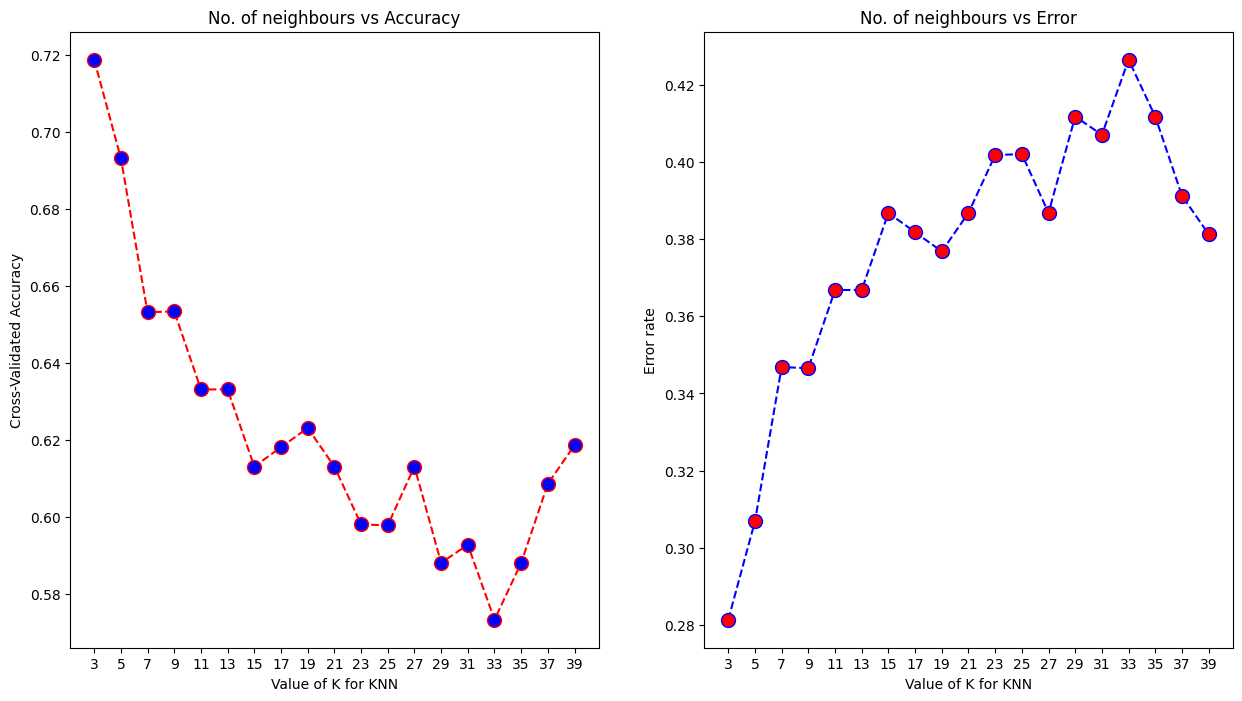

In [38]:

import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 3 to 39
k_range =np.array(range(3,40,2))
k_scores = []
error_rate = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())

    error_rate.append((1-scores.mean()))



plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xticks(k_range)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('No. of neighbours vs Accuracy')

plt.subplot(1,2,2)
plt.plot(k_range , error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xticks(k_range)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error rate')
plt.title('No. of neighbours vs Error')

plt.show()

Lets apply K-NN for K = 3 (for maximum accuracy)

K Fold Cross Validation

In [40]:
num_folds = 10
kfold = KFold(n_splits=10, shuffle=True)

model = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(model, x, y, cv=kfold)

print('Batchwise accuracy','\n',results, '\n')
print('Overall accuracy', np.round(results.mean(),3))

Batchwise accuracy 
 [0.75       0.8        0.75       0.65       0.7        0.7
 0.7        0.75       0.85       0.63157895] 

Overall accuracy 0.728


In [41]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
pred_y = model.predict(x_test)
accuracy_score(y_test, pred_y)

0.6666666666666666

In [42]:
print(classification_report(y_test, pred_y))


              precision    recall  f1-score   support

           1       0.52      0.83      0.64        18
           2       0.78      0.61      0.68        23
           3       0.00      0.00      0.00         7
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.86      0.92         7

    accuracy                           0.67        60
   macro avg       0.66      0.72      0.67        60
weighted avg       0.64      0.67      0.64        60



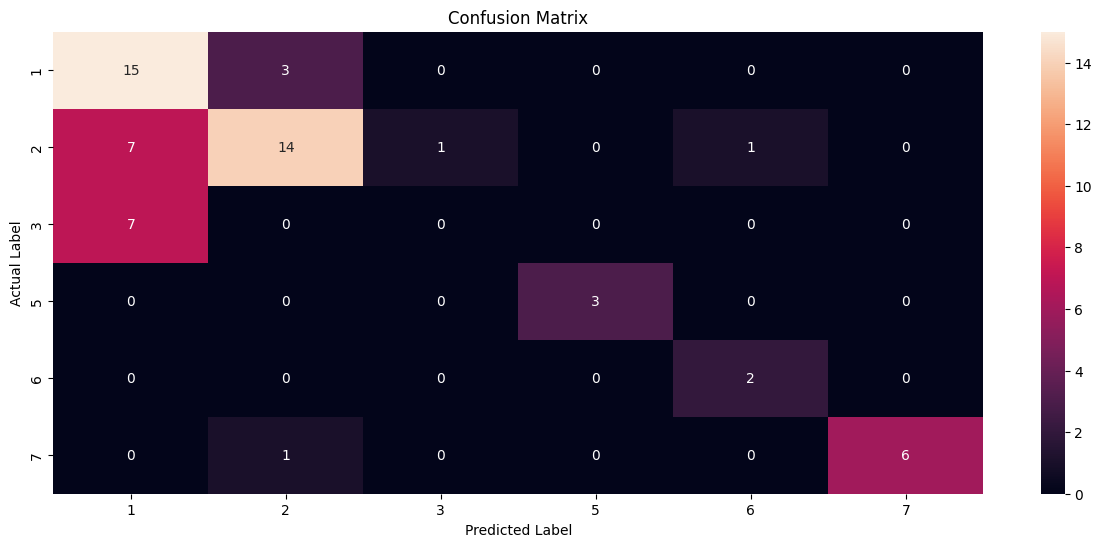

In [43]:
cm_df = confusion_matrix(y_test, pred_y)
class_label = ['1','2','3','5','6','7'] #class 4 is absent in dataset

df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
plt.figure(figsize=(15,6))
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()




The duplicated values and the outliers were removed from the dataset

Standard Scaler was used

Grid Serach was used to find the optimal k value for the KNN algorithm

The accuracy of KNN models was greatest when k=3